# **Tugas Besar Pembelajaran Mesin Tahap 1**

Nama : Musthafa Zaki Bahar

NIM : 1301190335

Kelas : IF - 43 - 12

**Import Library Yang Dibutuhkan**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

**Read Data**




In [ ]:
data_kendaraan = pd.read_csv('https://raw.githubusercontent.com/mzakibhr/Tubes1_ML/main/kendaraan_train.csv')

In [ ]:
data_kendaraan

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


**Eksplorasi dan Persiapan Data**

In [ ]:
# Drop column ID dan Tertarik
data_kendaraan.drop(['id', 'Tertarik'], axis=1, inplace=True)
data_kendaraan

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


In [ ]:
# Melakukan Cek Null Value
data_kendaraan.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [ ]:
# Jumlah Data
len(data_kendaraan)

285831

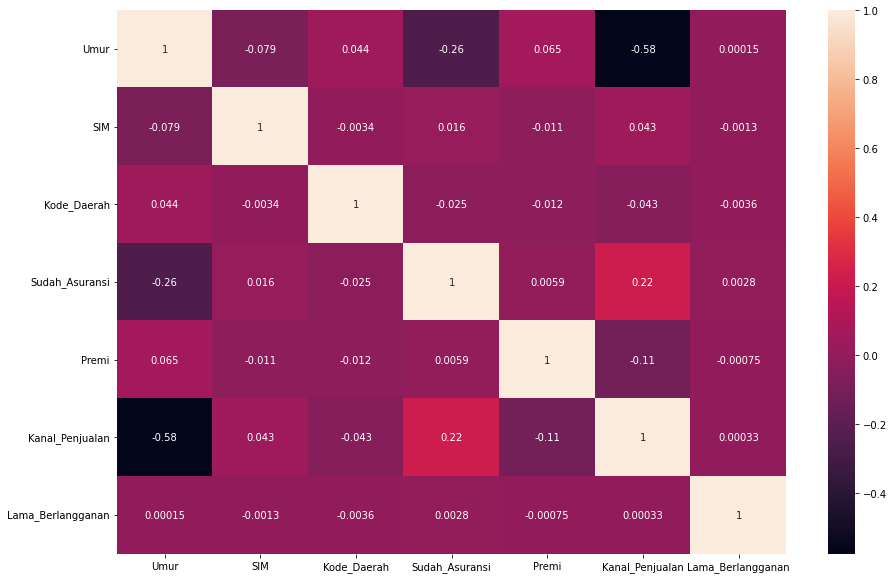

In [ ]:
import seaborn as sns
#Korelasi antar feature
data_corr = data_kendaraan.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data_corr, annot=True, ax=ax)

*Catatan : Umur dan Kanal_Penjualan mempunyai korelasi yang cukup baik yaitu -0.58, sehingga feature Umur dan Kanal_Penjualan digunakan untuk clustering.

In [ ]:
# Mengambil feature yang akan digunakan untuk clustering
data = data_kendaraan[['Umur', 'Kanal_Penjualan']]
data

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
2,21.0,160.0
3,58.0,124.0
4,50.0,88.0
...,...,...
285826,23.0,152.0
285827,21.0,152.0
285828,23.0,152.0
285829,68.0,124.0


In [ ]:
# Mengisi data null dengan mean dari setiap kolom
data = data.apply(lambda x: x.fillna(x.mean()),axis=0)
data

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
2,21.0,160.0
3,58.0,124.0
4,50.0,88.0
...,...,...
285826,23.0,152.0
285827,21.0,152.0
285828,23.0,152.0
285829,68.0,124.0


In [ ]:
# Cek data masih ada null/tidak
data.isnull().sum()

Umur               0
Kanal_Penjualan    0
dtype: int64

In [ ]:
# Memastikan data tidak ada yang terhapus/drop
len(data)

285831

In [ ]:
# Normalisasi Min-Max
data = data.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
data

,Umur,Kanal_Penjualan
0,-0.136067,0.246780
1,0.140856,-0.512479
2,-0.274528,0.296163
3,0.294703,0.073941
4,0.171626,-0.148281
...,...,...
285826,-0.243759,0.246780
285827,-0.274528,0.246780
285828,-0.243759,0.246780
285829,0.448549,0.073941


In [ ]:
#Eksport Data Hasil Preprocessing(Kebutuhan Laporan)
data.to_csv("Data_Preprocessing.csv")

**Menentukan Jumlah Cluster Dengan Elbow Method**

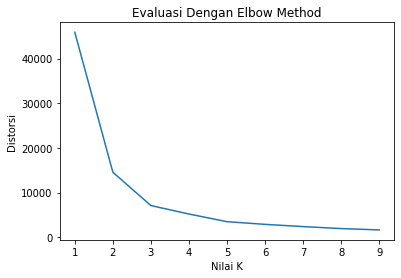

In [ ]:
from sklearn.cluster import KMeans #Kebutuhan Untuk Elbow Method
distorsi = []
# Inisialisasi nilai K
K = range(1,10)
for i in K:
    model = KMeans(n_clusters=i).fit(data)
    model.fit(data)
    distorsi.append(model.inertia_)

# Visualisasi
plt.plot(K, distorsi)
plt.xlabel('Nilai K')
plt.ylabel('Distorsi')
plt.title('Evaluasi Dengan Elbow Method')
plt.show()

In [ ]:
# Inisialisasi Cluster dari hasil Elbow Method
k = 3

In [ ]:
# Metode Euclidean
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))
# Metode K-Means    
def kmeans(k, df, max_I):
    # Mencari Centroid Secara Acak
    centroid = {i: df[random.randint(0, len(df))] for i in range(k)}

    for i in range(max_I):
        cluster = {i: [] for i in range(k)}
        # Mencari Nilai Terdekat Pada Data Untuk Setiap Centroid Dengan Metode Euclidean
        for j in df:
            dist = [euclidean(j, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(j)
        # Mencari Nilai Centroid Ulang Dari Setiap Cluster
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
    # Output
    return centroid, cluster

**Main Program**

In [ ]:
df = data.to_numpy()
max_I = 50
# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, df, max_I)

In [ ]:
df = []
#Menginputkan Hasil Looping Kedalam Array
for i in cluster.keys():
    for j in cluster.get(i):
        df.append((j[0], j[1], i))

#Set Array ke DataFrame
df = pd.DataFrame(df)
df.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
df.sample(5)

,Umur,Kanal_Penjualan,Cluster
203480,-0.228374,0.246780,2
261855,-0.166836,0.314682,2
245097,-0.243759,0.246780,2
177915,-0.228374,0.246780,2
98793,0.002395,-0.555689,1


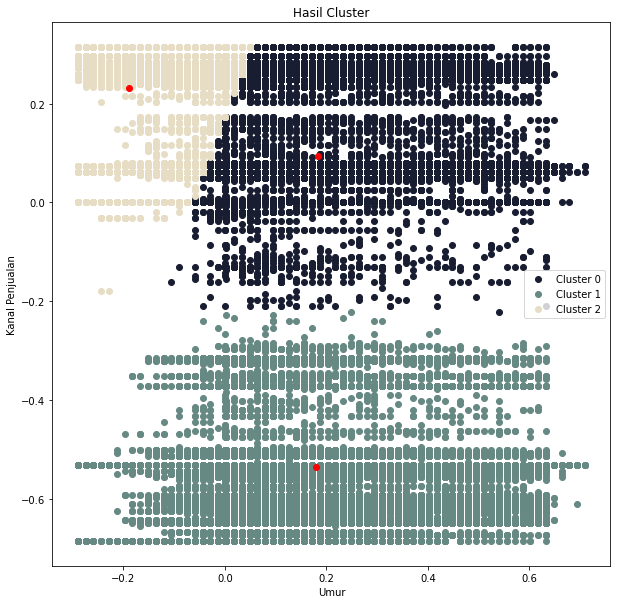

In [ ]:
# Set Warna Setiap CLuster
warna = ['#181D31', '#678983', '#E6DDC4'] 

for i in range(k):
    plt.scatter(
        df['Umur'][df['Cluster'] == i], 
        df['Kanal_Penjualan'][df['Cluster'] == i],
        color=warna[i],
        label=f'Cluster {i}'
    )
    plt.scatter(centroid[i][0], centroid[i][1], color='r', marker='o')
# Visualisasi
plt.title('Hasil Cluster')
plt.xlabel("Umur")
plt.ylabel("Kanal Penjualan")
plt.legend(loc=0)
plt.gcf().set_size_inches((10, 10))
plt.show()

In [ ]:
#Eksport Data Hasil Clustering
df.to_csv("Data_Clustering.csv")